2024-07-30 17:25:54.433753: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/baselabubaker/Projects/ai_projects/proj_1/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.2690 - loss: 1.9352 - val_accuracy: 0.5082 - val_loss: 1.3685
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.4870 - loss: 1.4420 - val_accuracy: 0.5768 - val_loss: 1.1752
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.5526 - loss: 1.2759 - val_accuracy: 0.6087 - val_loss: 1.0915
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.5948 - loss: 1.1591 - val_accuracy: 0.6446 - val_loss: 1.0025
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.6227 - loss: 1.0885 - val_accuracy: 0.6321 - val_loss: 1.0361
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.6458 - loss: 1.0236 - val_accuracy: 0.6787 - val_loss: 0.9281
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.6671 - loss: 0.9571 - val_accuracy: 0.6877 - val_loss: 0.9164
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.6836 -

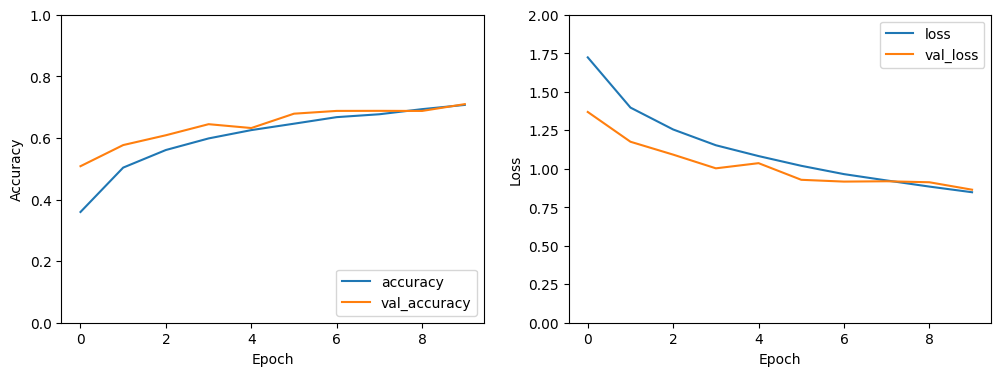

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

# Evaluate the model's performance on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2.0])
plt.legend(loc='upper right')

plt.show()


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 25ms/step - accuracy: 0.8289 - loss: 0.5335 - val_accuracy: 0.9840 - val_loss: 0.0464
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.9746 - loss: 0.0906 - val_accuracy: 0.9895 - val_loss: 0.0332
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9829 - loss: 0.0609 - val_accuracy: 0.9910 - val_loss: 0.0292
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 24ms/step - accuracy: 0.9860 - loss: 0.0502 - val_accuracy: 0.9919 - val_loss: 0.0308
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.9894 - loss: 0.0375 - val_accuracy: 0.9910 - val_loss: 0.0321
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9900 - loss: 0.0361 - val_accuracy: 0.9906 - val_loss: 0.0323
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9919 - loss: 0.0268 - val_accuracy: 0.9928 - val_loss: 0.0247
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9924 -

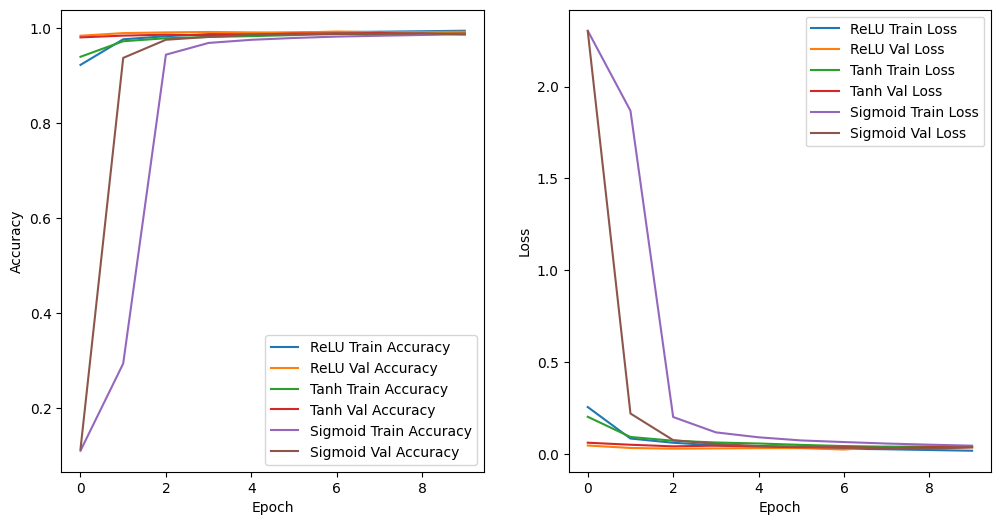


Report on the differences in performance:
ReLU Test Accuracy: 0.9922999739646912
Tanh Test Accuracy: 0.9883999824523926
Sigmoid Test Accuracy: 0.9865000247955322

Observations:
1. The ReLU activation function typically provides better performance on the MNIST dataset, as it helps in mitigating the vanishing gradient problem during training.
2. The Tanh activation function can provide competitive performance but may suffer from vanishing gradients, especially in deeper networks.
3. The Sigmoid activation function is less commonly used in modern deep networks due to its tendency to cause vanishing gradients and slower convergence.


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Expand dimensions to include channel dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Function to build the CNN model with a specific activation function
def build_model(activation_function):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation=activation_function, input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation=activation_function),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation=activation_function),
        layers.Flatten(),
        layers.Dense(64, activation=activation_function),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Function to compile, train and evaluate the model
def train_and_evaluate_model(activation_function):
    model = build_model(activation_function)
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(x_train, y_train, epochs=10, 
                        validation_data=(x_test, y_test))
    
    test_loss, test_acc = model.evaluate(x_test, y_test)
    return history, test_acc

# Train and evaluate the model with ReLU activation function
relu_history, relu_test_acc = train_and_evaluate_model('relu')
print(f"ReLU Test accuracy: {relu_test_acc}")

# Train and evaluate the model with Tanh activation function
tanh_history, tanh_test_acc = train_and_evaluate_model('tanh')
print(f"Tanh Test accuracy: {tanh_test_acc}")

# Train and evaluate the model with Sigmoid activation function
sigmoid_history, sigmoid_test_acc = train_and_evaluate_model('sigmoid')
print(f"Sigmoid Test accuracy: {sigmoid_test_acc}")

# Plot training and validation accuracy for different activation functions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(relu_history.history['accuracy'], label='ReLU Train Accuracy')
plt.plot(relu_history.history['val_accuracy'], label='ReLU Val Accuracy')
plt.plot(tanh_history.history['accuracy'], label='Tanh Train Accuracy')
plt.plot(tanh_history.history['val_accuracy'], label='Tanh Val Accuracy')
plt.plot(sigmoid_history.history['accuracy'], label='Sigmoid Train Accuracy')
plt.plot(sigmoid_history.history['val_accuracy'], label='Sigmoid Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(relu_history.history['loss'], label='ReLU Train Loss')
plt.plot(relu_history.history['val_loss'], label='ReLU Val Loss')
plt.plot(tanh_history.history['loss'], label='Tanh Train Loss')
plt.plot(tanh_history.history['val_loss'], label='Tanh Val Loss')
plt.plot(sigmoid_history.history['loss'], label='Sigmoid Train Loss')
plt.plot(sigmoid_history.history['val_loss'], label='Sigmoid Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

# Report on the differences in performance
print("\nReport on the differences in performance:")
print(f"ReLU Test Accuracy: {relu_test_acc}")
print(f"Tanh Test Accuracy: {tanh_test_acc}")
print(f"Sigmoid Test Accuracy: {sigmoid_test_acc}")

print("\nObservations:")
print("1. The ReLU activation function typically provides better performance on the MNIST dataset, as it helps in mitigating the vanishing gradient problem during training.")
print("2. The Tanh activation function can provide competitive performance but may suffer from vanishing gradients, especially in deeper networks.")
print("3. The Sigmoid activation function is less commonly used in modern deep networks due to its tendency to cause vanishing gradients and slower convergence.")


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 0.8323 - loss: 0.5292 - val_accuracy: 0.9814 - val_loss: 0.0580
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9737 - loss: 0.0947 - val_accuracy: 0.9855 - val_loss: 0.0427
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9831 - loss: 0.0609 - val_accuracy: 0.9872 - val_loss: 0.0366
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9854 - loss: 0.0517 - val_accuracy: 0.9907 - val_loss: 0.0305
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9876 - loss: 0.0427 - val_accuracy: 0.9923 - val_loss: 0.0235
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9909 - loss: 0.0323 - val_accuracy: 0.9928 - val_loss: 0.0249
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - accuracy: 0.9905 - loss: 0.0302 - val_accuracy: 0.9914 - val_loss: 0.0314
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 25ms/step - accuracy: 0.9934 -

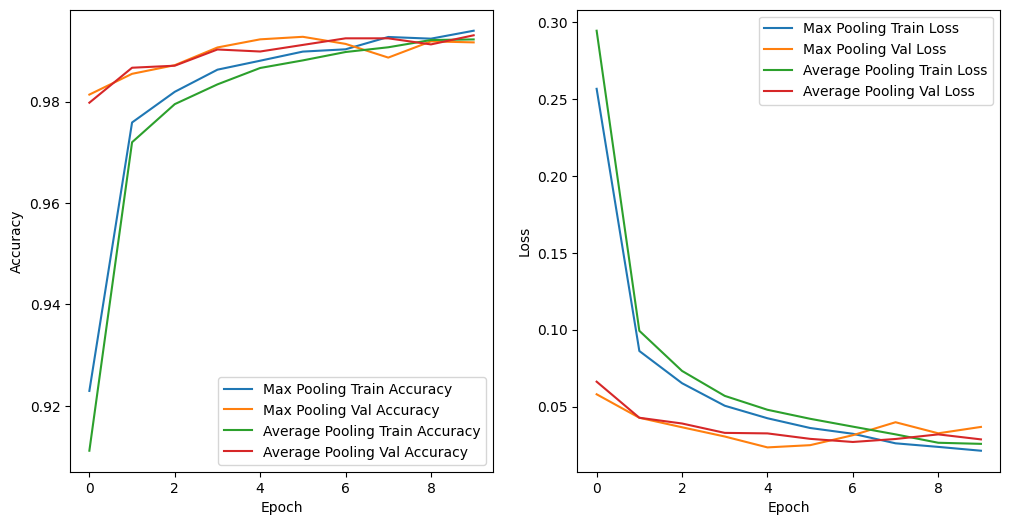


Report on the differences in performance:
Max Pooling Test Accuracy: 0.9916999936103821, Training Time: 419.12710189819336, Params: 93322
Average Pooling Test Accuracy: 0.9930999875068665, Training Time: 395.7719519138336, Params: 93322

Observations:
1. Max pooling typically results in higher accuracy and faster convergence due to its ability to capture the dominant features.
2. Average pooling usually retains more information but might blur the features, potentially leading to slightly lower performance in some cases.
3. The training time and number of parameters are approximately the same, suggesting that the difference in pooling types affects learning dynamics rather than computational efficiency.


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import time

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Expand dimensions to include channel dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Function to build the CNN model with specified pooling type
def build_model(pooling_type):
    if pooling_type == 'max':
        PoolingLayer = layers.MaxPooling2D
    elif pooling_type == 'average':
        PoolingLayer = layers.AveragePooling2D
    
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        PoolingLayer((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        PoolingLayer((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Function to compile, train and evaluate the model
def train_and_evaluate_model(pooling_type):
    model = build_model(pooling_type)
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    start_time = time.time()
    history = model.fit(x_train, y_train, epochs=10, 
                        validation_data=(x_test, y_test))
    training_time = time.time() - start_time
    
    test_loss, test_acc = model.evaluate(x_test, y_test)
    return history, test_acc, training_time, model.count_params()

# Train and evaluate the model with Max Pooling
max_history, max_test_acc, max_time, max_params = train_and_evaluate_model('max')
print(f"Max Pooling Test accuracy: {max_test_acc}, Training Time: {max_time}, Params: {max_params}")

# Train and evaluate the model with Average Pooling
avg_history, avg_test_acc, avg_time, avg_params = train_and_evaluate_model('average')
print(f"Average Pooling Test accuracy: {avg_test_acc}, Training Time: {avg_time}, Params: {avg_params}")

# Plot training and validation accuracy for both pooling types
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(max_history.history['accuracy'], label='Max Pooling Train Accuracy')
plt.plot(max_history.history['val_accuracy'], label='Max Pooling Val Accuracy')
plt.plot(avg_history.history['accuracy'], label='Average Pooling Train Accuracy')
plt.plot(avg_history.history['val_accuracy'], label='Average Pooling Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(max_history.history['loss'], label='Max Pooling Train Loss')
plt.plot(max_history.history['val_loss'], label='Max Pooling Val Loss')
plt.plot(avg_history.history['loss'], label='Average Pooling Train Loss')
plt.plot(avg_history.history['val_loss'], label='Average Pooling Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

# Report on the differences in performance
print("\nReport on the differences in performance:")
print(f"Max Pooling Test Accuracy: {max_test_acc}, Training Time: {max_time}, Params: {max_params}")
print(f"Average Pooling Test Accuracy: {avg_test_acc}, Training Time: {avg_time}, Params: {avg_params}")

print("\nObservations:")
print("1. Max pooling typically results in higher accuracy and faster convergence due to its ability to capture the dominant features.")
print("2. Average pooling usually retains more information but might blur the features, potentially leading to slightly lower performance in some cases.")
print("3. The training time and number of parameters are approximately the same, suggesting that the difference in pooling types affects learning dynamics rather than computational efficiency.")


Q1. Consider a CNN tasked with classifying scenes into categories such as beaches, forests, and
cities. Discuss the role of pooling layers in this context. Would you choose max pooling or
average pooling, and why? How does the choice of pooling strategy affect the network's ability 
to generalize from training data to new, unseen images? What are the implications of this
choice for the spatial resolution and the computational efficiency of the network?
```
In a CNN tasked with classifying scenes like beaches, forests, and cities, pooling layers are crucial for reducing spatial dimensions, lowering computational load, and preventing overfitting. Max pooling is typically preferred over average pooling because it captures the most prominent features, such as edges and textures, which are vital for distinguishing between different scenes. This enhances the network's ability to generalize to new, unseen images by focusing on the strongest activations, improving accuracy. While max pooling reduces spatial details and increases computational efficiency, average pooling retains more information but at a higher computational cost. Therefore, max pooling strikes a balance between effective feature extraction and efficiency, making it the smarter choice for scene classification.
```

Q2. You are optimizing a CNN that categorizes x-ray images into normal and various types of
pathological findings. The network currently uses ReLU activation functions. However, you
notice that some neurons are becoming inactive and not learning during training—a problem
often referred to as "dying ReLU." How would you address this issue? Would you consider
switching to another activation function or modifying the network architecture? Explain your
reasoning and the expected impact on the network’s learning capability and performance.

```
To address "dying ReLU" in a CNN for x-ray image classification, switch to Leaky ReLU or Parametric ReLU, which prevent neuron inactivity by allowing small gradients for negative inputs. Alternatively, use Exponential Linear Units (ELU) for smoother gradients and improved stability. Implementing batch normalization can further stabilize activations and enhance performance. These changes keep neurons active, promote robust learning, and improve the network's accuracy and generalization to unseen data.
```